<a href="https://colab.research.google.com/github/JuanCVanegas/Practical_Cases/blob/main/CLTV_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

### Company Name:
Major Consumer Electronics Company  

### Problem Type:
Customer Lifetime Value (CLV) Analytics

### Business Problem:

Identify the most valuable customer segments and guide marketing strategies to improve CLV.

### Business Goal:

Provide data-driven insights and actionable recommendations to the marketing team in order to strategically optimize marketing efforts, target the right audience segments, and implement effective campaigns that will drive customer engagement, conversion rates, and ultimately increase revenue for the company.

# Import Main Libraries

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Setting seaborn color palette
palette = sns.set_palette('bright')

# Load Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
data = pd.read_csv('customer_acquisition_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis and Data Visualization

In [ ]:
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [ ]:
data.describe()

,customer_id,cost,conversion_rate,revenue
count,800.0000,800.000000,800.000000,800.000000
mean,400.5000,13.148052,0.086305,2769.151250
std,231.0844,9.922337,0.059611,1259.543706
min,1.0000,5.246263,0.016341,500.000000
25%,200.7500,5.246263,0.043822,1694.000000
50%,400.5000,8.320327,0.043822,2764.000000
75%,600.2500,9.546326,0.123145,3824.250000
max,800.0000,30.450327,0.167592,4998.000000


# Distribution of Numeric Variables

<Axes: title={'center': 'Distribution of Revenue'}, xlabel='revenue', ylabel='Count'>

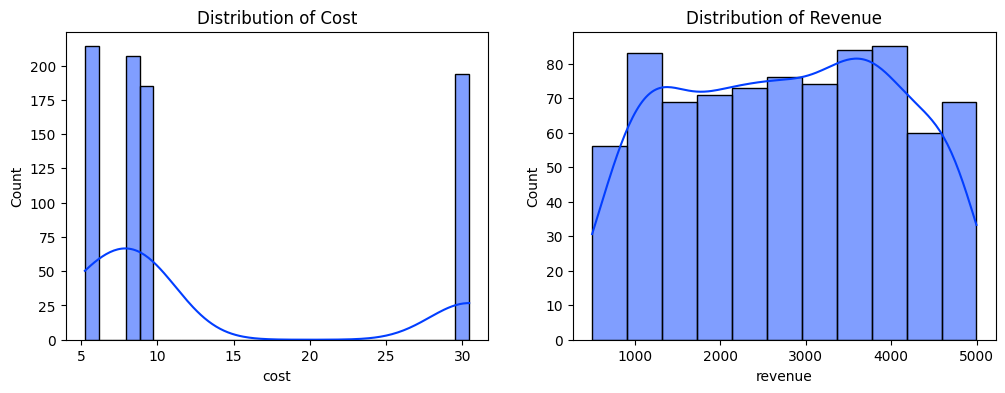

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Distribution of Cost')
sns.histplot(data, x='cost', kde=True, ax=ax1)
ax2.set_title('Distribution of Revenue')
sns.histplot(data, x='revenue', kde=True, ax=ax2)

# Distribution of Categorical Variables

<Axes: xlabel='channel', ylabel='count'>

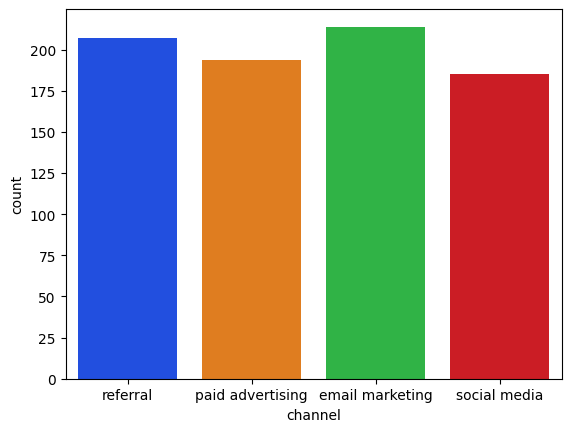

In [ ]:
sns.countplot(data, x='channel')

In [ ]:
# Grouping the data based on 'channel'
channel_groups = data.groupby('channel')

<Axes: xlabel='channel', ylabel='cost'>

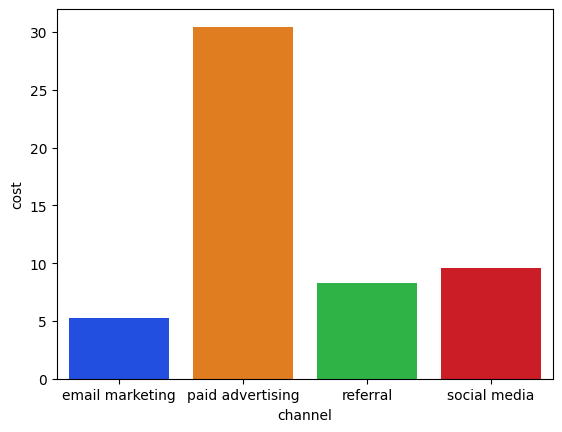

In [ ]:
# Aggregating 'cost' for each channel group
cost_by_channel = channel_groups['cost'].mean().reset_index()

sns.barplot(cost_by_channel, x='channel', y='cost')

<Axes: xlabel='channel', ylabel='conversion_rate'>

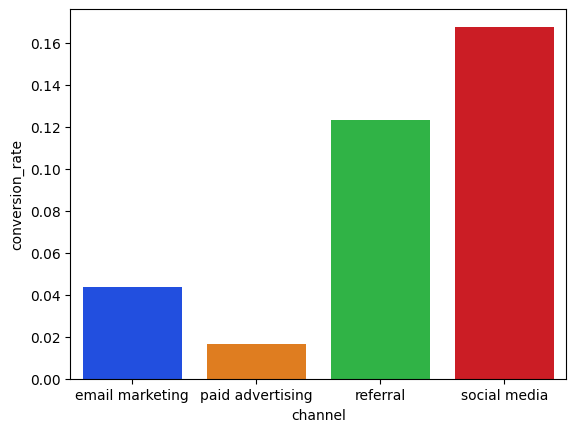

In [ ]:
# Aggregating 'conversion_rate' for each channel group
conversion_rate_by_channel = channel_groups['conversion_rate'].mean().reset_index()

sns.barplot(conversion_rate_by_channel, x='channel', y='conversion_rate')

([<matplotlib.patches.Wedge at 0x7fd144d19a50>,
 [Text(0.7197246891784876, 0.8318631929511785, 'email marketing'),
  Text(-0.8764846052318555, 0.6646613700160096, 'paid advertising'),
  Text(-0.6518041277985165, -0.8860876813187369, 'referral'),
  Text(0.8422743034228042, -0.7075125424991632, 'social media')],
 [Text(0.39257710318826594, 0.45374355979155184, '27.3%'),
  Text(-0.47808251194464835, 0.3625425654632779, '24.8%'),
  Text(-0.35552952425373624, -0.48332055344658376, '25.7%'),
  Text(0.4594223473215295, -0.3859159322722708, '22.2%')])

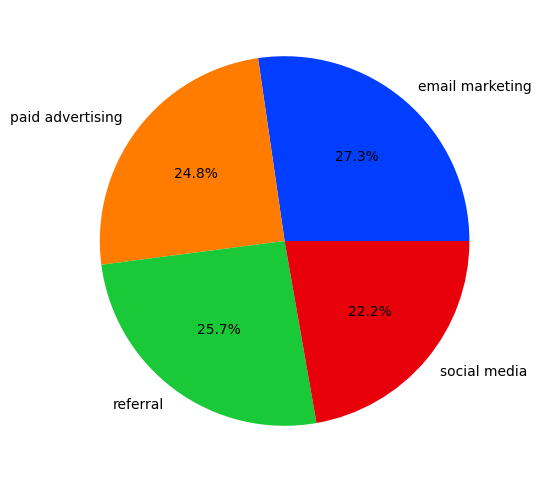

In [ ]:
# Aggregating 'revenue' for each channel group
revenue_by_channel = channel_groups['revenue'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%')




# Return on Investment (ROI)

Return on Investment (ROI) is a financial metric used to evaluate the profitability and efficiency of an investment. It measures the return or gain generated from an investment relative to its cost.

$ROI = \frac{{Revenue - Cost}}{{Cost}}$

In [ ]:
data['roi'] = (data['revenue'] - data['cost']) / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi
0,1,referral,8.320327,0.123145,4199,503.667681
1,2,paid advertising,30.450327,0.016341,3410,110.985660
2,3,email marketing,5.246263,0.043822,3164,602.095925
3,4,social media,9.546326,0.167592,1520,158.223564
4,5,referral,8.320327,0.123145,2419,289.733775


<Axes: xlabel='channel', ylabel='roi'>

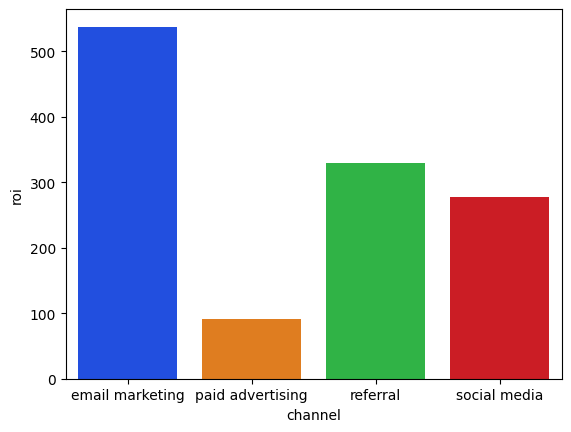

In [ ]:
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(roi_by_channel, x='channel', y='roi')

<Axes: >

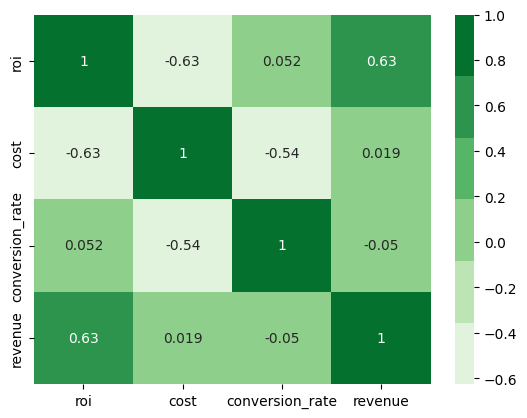

In [ ]:
# Computing the correlation matrix
corr = data[['roi', 'cost', 'conversion_rate', 'revenue']].corr()

sns.heatmap(corr, annot=True, cmap=sns.color_palette('Greens'))

# Customer Lifetime Value

CLTV (Customer Lifetime Value) analysis is a method used by businesses to estimate the total value a customer will generate over the entire duration of their relationship with the company. It is a valuable metric that helps businesses underst and the long-term profitability and worth of their customer base.
$CLTV = \frac{{(Revenue - Cost) \cdot ConversionRate}}{{Cost}}$

In [ ]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
data.head()

,customer_id,channel,cost,conversion_rate,revenue,roi,cltv
0,1,referral,8.320327,0.123145,4199,503.667681,62.024146
1,2,paid advertising,30.450327,0.016341,3410,110.985660,1.813671
2,3,email marketing,5.246263,0.043822,3164,602.095925,26.385185
3,4,social media,9.546326,0.167592,1520,158.223564,26.517043
4,5,referral,8.320327,0.123145,2419,289.733775,35.679260


<Axes: xlabel='channel', ylabel='cltv'>

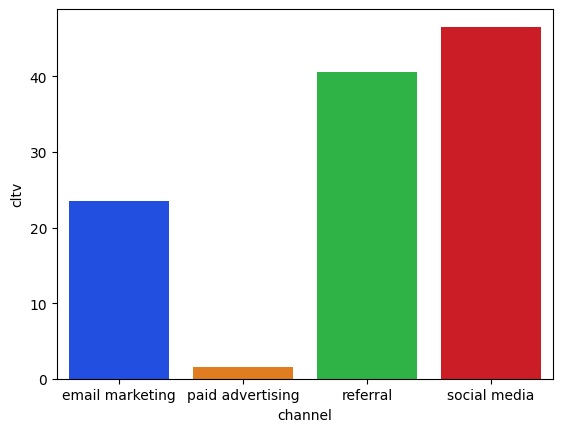

In [ ]:
cltv_by_channel = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(cltv_by_channel, x='channel', y='cltv')

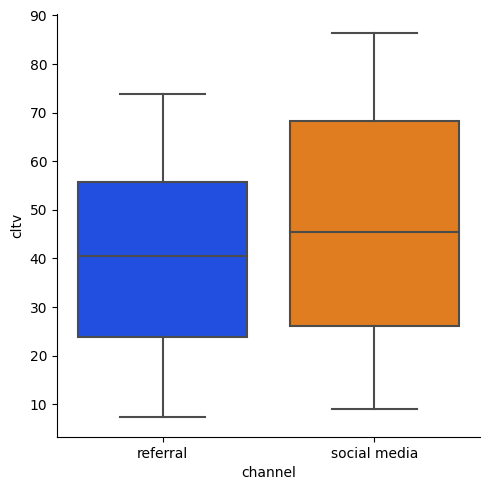

In [ ]:
# Selecting records where channel is referral or social media
select = data[data['channel'].isin(['referral', 'social media'])]

sns.catplot(select, x='channel', y='cltv', kind='box')